# Credit Card Fraud Detection

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # train_test_split function allows us to split into training and test data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from math import radians, sin, cos, sqrt, atan2

In [4]:
train_data = pd.read_csv('fraudTrain.csv', index_col=0)
test_data = pd.read_csv('fraudTest.csv', index_col=0)

# EXPLORING ROWS AND COLUMNS

In [5]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
train_data.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1048570,3/10/2020 16:07,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,F,05561 Farrell Crescent,Annapolis,...,39.0305,-76.5515,92106,"Accountant, chartered certified",5/28/1943,45ecd198c65e81e597db22e8d2ef7361,1362931649,38.779464,-76.317042,0
1048571,3/10/2020 16:07,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,F,043 Hanson Turnpike,Hedrick,...,41.1826,-92.3097,1583,Geochemist,6/28/1999,c00ce51c6ebb7657474a77b9e0b51f34,1362931670,41.400318,-92.726724,0
1048572,3/10/2020 16:08,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,F,005 Cody Estates,Louisville,...,38.2507,-85.7476,736284,Engineering geologist,4/2/1952,17c9dc8b2a6449ca2473726346e58e6c,1362931711,37.293339,-84.798122,0
1048573,3/10/2020 16:08,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,F,576 House Crossroad,West Sayville,...,40.7320,-73.1000,4056,Film/video editor,6/25/1990,5ca650881b48a6a38754f841c23b77ab,1362931718,39.773077,-72.213209,0
1048574,3/10/2020 16:08,2.283740e+15,fraud_Buckridge PLC,misc_pos,6.81,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,...,34.0770,-84.3033,165556,Prison officer,12/27/1997,8d0a575fe635bbde12f1a2bffc126731,1362931730,33.601468,-83.891921,0


In [7]:
test_data.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop               

In [9]:
train_data.describe().style.background_gradient()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417156502027958336.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,0.005728
std,1308811172818672640.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,0.075465
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000
25%,180040000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,0.000000
50%,3520550000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,0.000000
75%,4642260000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,0.000000
max,4992350000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,1.000000


# DATA VISUALIZATION

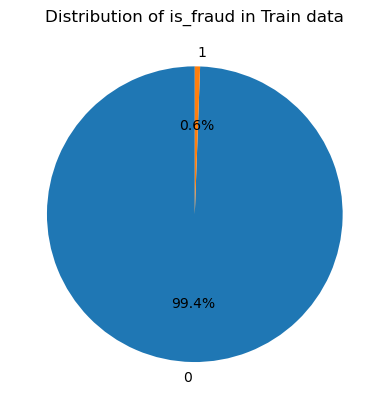

is_fraud
0    1042569
1       6006
Name: count, dtype: int64


In [10]:
value_counts = train_data['is_fraud'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of is_fraud in Train data')
plt.show()
print(value_counts)

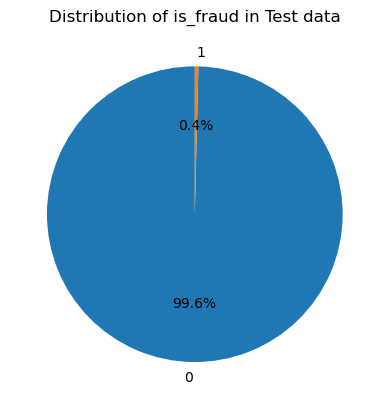

is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [11]:
value_counts = test_data['is_fraud'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of is_fraud in Test data')
plt.show()
print(value_counts)

In [12]:
print(train_data['gender'].value_counts())

gender
F    573968
M    474607
Name: count, dtype: int64


In [13]:
train_data = pd.get_dummies(train_data, columns = ['category', 'gender'], prefix = ['category', 'gender'])
test_data = pd.get_dummies(test_data, columns = ['category', 'gender'], prefix = ['category', 'gender'])

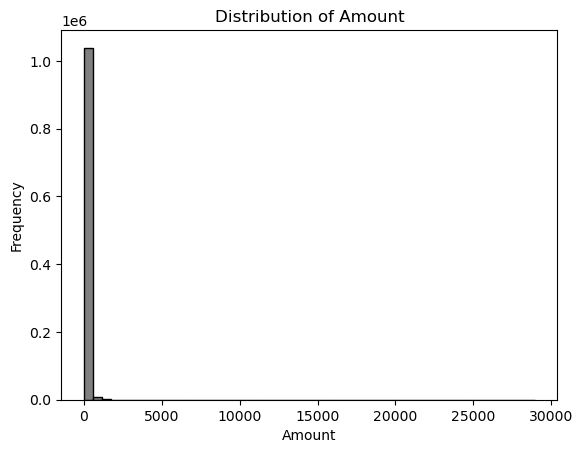

In [14]:
plt.hist(train_data['amt'], bins=50, color='gray', edgecolor='black')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.show()

In [15]:
train_data['log_amt'] = np.log(train_data['amt'])
test_data['log_amt'] = np.log(test_data['amt'])

Comment: Bimodal Distribution of Log-Transformed Amount, potentially showing two subgroups of transactions in the dataset.

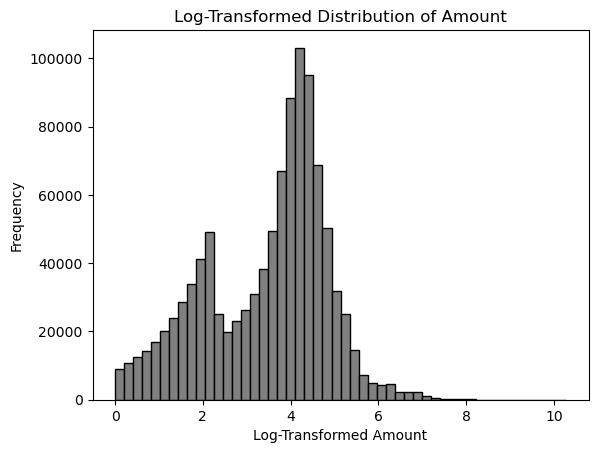

In [16]:
plt.hist(train_data['log_amt'], bins=50, color='gray', edgecolor='black')

plt.xlabel('Log-Transformed Amount')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Amount')
plt.show()

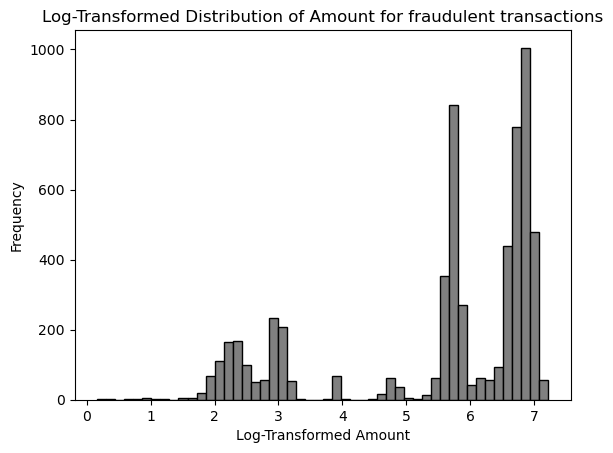

In [17]:
plt.hist(train_data[train_data['is_fraud'] == 1]['log_amt'], bins=50, color='gray', edgecolor='black')

plt.xlabel('Log-Transformed Amount')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Amount for fraudulent transactions')
plt.show()

# DATA CLEANING

In [18]:
train_data.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
category_entertainment     0
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_net          0
category_misc_pos          0
category_personal_care     0
category_shopping_net      0
category_shopping_pos      0
category_travel            0
gender_F      

In [19]:
train_data.isnull()


,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,zip,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,log_amt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
train_data.isnull().sum()


trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
category_entertainment     0
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_net          0
category_misc_pos          0
category_personal_care     0
category_shopping_net      0
category_shopping_pos      0
category_travel            0
gender_F      

In [21]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    distance = 2 * R * atan2(sqrt(a), sqrt(1 - a))
    return distance

# Apply Haversine function to create the "Distance" column
train_data['distanceInKM'] = train_data.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
test_data['distanceInKM'] = test_data.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


In [22]:
# Verify
print(train_data[['lat','long','merch_lat','merch_long','distanceInKM']].head())

       lat      long  merch_lat  merch_long  distanceInKM
0  36.0788  -81.1781  36.011293  -82.048315     78.597568
1  48.8878 -118.2105  49.159047 -118.186462     30.212176
2  42.1808 -112.2620  43.150704 -112.154481    108.206083
3  46.2306 -112.1138  47.034331 -112.561071     95.673231
4  38.4207  -79.4629  38.674999  -78.632459     77.556744


In [23]:
train_data['trans_datetime'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['DayOfWeek'] = train_data['trans_datetime'].dt.dayofweek # 0 to 6

test_data['trans_datetime'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['DayOfWeek'] = test_data['trans_datetime'].dt.dayofweek # 0 to 6

In [24]:
# Apply sine and cosine transformations
train_data['DayOfWeekSin'] = np.sin(2 * np.pi * train_data['DayOfWeek'] / 7)
train_data['DayOfWeekCos'] = np.cos(2 * np.pi * train_data['DayOfWeek'] / 7)

test_data['DayOfWeekSin'] = np.sin(2 * np.pi * test_data['DayOfWeek'] / 7)
test_data['DayOfWeekCos'] = np.cos(2 * np.pi * test_data['DayOfWeek'] / 7)

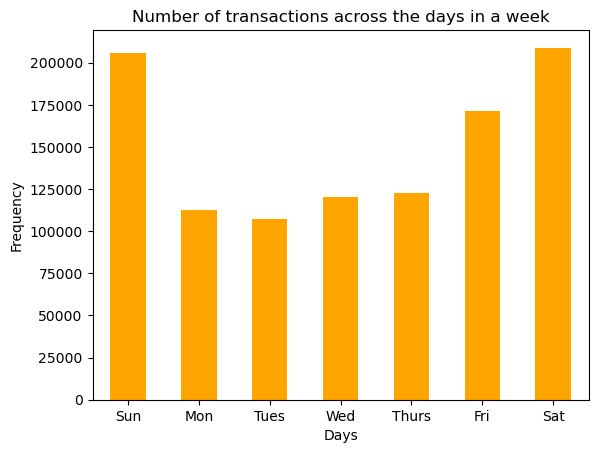

In [25]:
value_counts = train_data['DayOfWeek'].value_counts().sort_index()
value_counts.plot(kind='bar', color='orange')
plt.title('Number of transactions across the days in a week')
plt.ylabel('Frequency')
plt.xlabel('Days')

plt.xticks(value_counts.index, ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'], rotation=0)  

plt.show()

In [26]:
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = np.ceil((train_data['trans_datetime'] - train_data['dob']).dt.days / 365).astype(int)

test_data['dob'] = pd.to_datetime(test_data['dob'])
test_data['age'] = np.ceil((test_data['trans_datetime'] - test_data['dob']).dt.days / 365).astype(int)

In [27]:
# Verify
print(train_data[['dob', 'trans_datetime', 'age']].head())

         dob      trans_datetime  age
0 1988-03-09 2019-01-01 00:00:00   31
1 1978-06-21 2019-01-01 00:00:00   41
2 1962-01-19 2019-01-01 00:00:00   57
3 1967-01-12 2019-01-01 00:01:00   53
4 1986-03-28 2019-01-01 00:03:00   33


In [28]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date_trans_time    555719 non-null  object        
 1   cc_num                   555719 non-null  float64       
 2   merchant                 555719 non-null  object        
 3   amt                      555719 non-null  float64       
 4   first                    555719 non-null  object        
 5   last                     555719 non-null  object        
 6   street                   555719 non-null  object        
 7   city                     555719 non-null  object        
 8   state                    555719 non-null  object        
 9   zip                      555719 non-null  int64         
 10  lat                      555719 non-null  float64       
 11  long                     555719 non-null  float64       
 12  city_pop             

# DATA MODELING

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
category_columns = train_data.filter(like='category_', axis=1).astype(int)
gender_columns = train_data.filter(like='gender_', axis=1).astype(int)
X_train = pd.concat([train_data[['city_pop', 'log_amt', 'DayOfWeekSin', 'DayOfWeekCos', 'age', 'distanceInKM']], category_columns, gender_columns], axis=1)
y_train = train_data['is_fraud']

In [31]:
category_columns = test_data.filter(like='category_', axis=1).astype(int)
gender_columns = test_data.filter(like='gender_', axis=1).astype(int)
X_test = pd.concat([test_data[['city_pop', 'log_amt', 'DayOfWeekSin', 'DayOfWeekCos', 'age', 'distanceInKM']], category_columns, gender_columns], axis=1)
y_test = test_data['is_fraud']

# Logistic Regression

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9961401355721147
Confusion Matrix:
[[553574      0]
 [  2145      0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RandomForestClassifier Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=4)

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9977866511672266
Confusion Matrix:
[[553278    296]
 [   934   1211]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.80      0.56      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.90      0.78      0.83    555719
weighted avg       1.00      1.00      1.00    555719

